In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
N = 10 ** 4

Напишем функцию, которая создает выборку размера $N$ из равномерного распределения на отрезке $[0, \theta]$:

In [3]:
def CreateSample(theta):
    uniform_rv = sts.uniform(loc=0, scale=theta)
    sample = uniform_rv.rvs(N)
    return sample

Создадим выборку размером $N = 10^4$ с $\theta = 2$:

In [4]:
theta = 2
sample = CreateSample(theta)

Напишем функцию, которая по заданной выборке считает оценки параметра $\theta$ из теоретической задачи: $2\overline{X},\; \overline{X} + \frac{X_{(n)}}{2},\; (n + 1)X_{(1)},\; X_{(1)} + X_{(n)},\; \frac{n + 1}{n}X_{(n)}$

In [5]:
def CreateEstimators(sample):
    estimators = np.zeros((5, N))
    for i in range(N):
        estimators[0][i] = np.mean(sample[:i + 1]) * 2
        estimators[1][i] = (np.mean(sample[:i + 1]) + np.max(sample[:i + 1]) / 2)
        estimators[2][i] = (i + 2) * np.min(sample[:i + 1])
        estimators[3][i] = np.min(sample[:i + 1]) + np.max(sample[:i + 1])
        estimators[4][i] = (i + 2) / (i + 1) * np.max(sample[:i + 1])
    return estimators

Создадим вектор из оценок параметра $\theta$:

In [6]:
estimators = CreateEstimators(sample)

Напишем функцию, которая будет строить график зависимости модуля разности оценки и истинного значения параметра $\theta$ от размера выборки для каждой оценки:

In [10]:
def MakePlot(estimators, theta):
    x = range(1, N+1)
    plt.figure(figsize=(12, 6))
    names = [r'$2\overline{X}$', r'$\overline{X} + \frac{X_{(n)}}{2}$', \
             r'$(n + 1)X_{(1)}$', \
             r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n}X_{(n)}$']
    
    for estimator, color, name in zip(estimators, ['b', 'g', 'y', 'black', 'r'], names):
        plt.plot(x, abs(estimator - theta), color, label=name)
    
    plt.title(r"""График зависимости модуля разности оценки и истинного значения 
              параметра $\theta$ = {} от размера выборки""".format(theta))
    plt.xlabel("n")
    plt.ylabel(r"$|\theta* - \theta|$")
    plt.legend(loc='best');

Строим график зависимости для $\theta$ = 2:

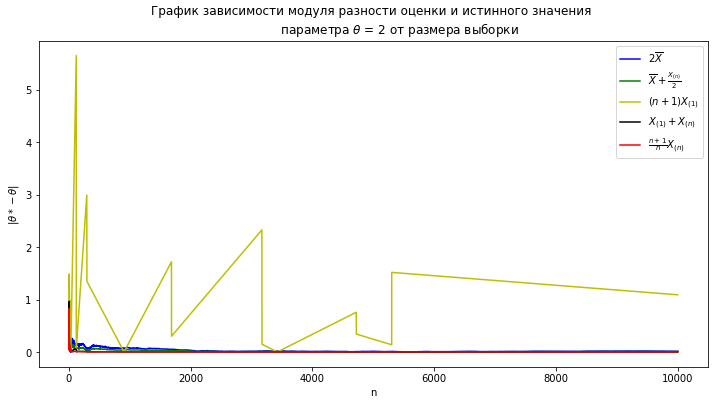

In [11]:
MakePlot(estimators, theta)

Как видно из графика, оценка $(n + 1)X_{(1)}$ сильно отличается от истинного значения. Это связано с тем, что данная оценка не является состоятельной, что было доказано на семинаре, то есть она не сходится даже по вероятности к истинному значению $\theta$ и поэтому имеет с ним такую большую разницу даже при больших n. Остальные же оценки являются сильно состоятельными, то есть сходятся почти наверно к $\theta$ и поэтому их отклонение заметно меньше даже при небольших n.

Тогда построим график без учета оценки $(n + 1)X_{(1)}$, чтобы лучше разглядеть скорость сходимости остальных оценок:

In [12]:
def MakePlotWithoutThird(estimators, ylim, theta):
    x = range(1, N + 1)
    plt.figure(figsize=(12, 6))
    
    new_estimators = np.delete(estimators, 2, 0)
    
    names = [r'$2\overline{X}$', r'$\overline{X} + \frac{X_{(n)}}{2}$', \
             r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n}X_{(n)}$']
    
    for estimator, color, name in zip(new_estimators, ['b', 'g', 'black', 'r'], names):
        plt.plot(x, abs(estimator - theta), color, label=name)
    
    plt.title(r"""График зависимости модуля разности оценки и истинного 
    значения параметра $\theta$ = {} от размера выборки""".format(theta))
    plt.xlabel("n")
    plt.ylabel(r"$|\theta* - \theta|$")
    plt.ylim(0, ylim)
    plt.legend(loc='best');

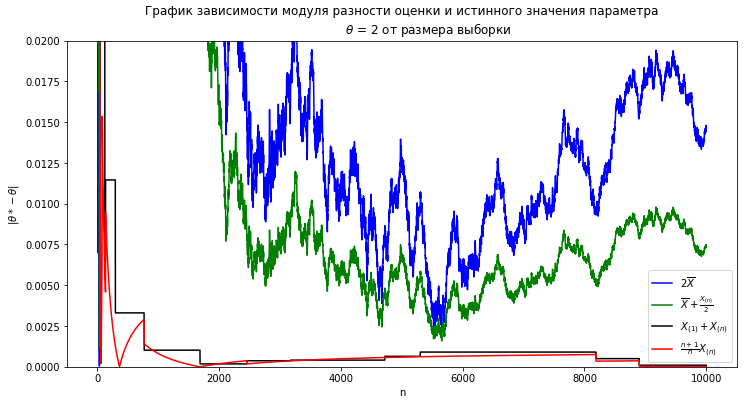

In [13]:
MakePlotWithoutThird(estimators, 0.02, theta)

Из графика видно, что быстрее всего сходится оценка $\frac{(n + 1)}{n}X_{(n)}$, медленей всего - $2\overline{X}$. Тем не менее, все оценки дают точность не менее 0.002 при $N = 10 ^ 4$.

Проведем те же опыты для $\theta = 10, 100, 1000$ не учитывая оценку $(n + 1)X_{(1)}$, так как она не сходится к истинной и ухудшает качество измереняя точности других оценок

In [14]:
theta = 10
sample = CreateSample(theta)
estimators = CreateEstimators(sample)

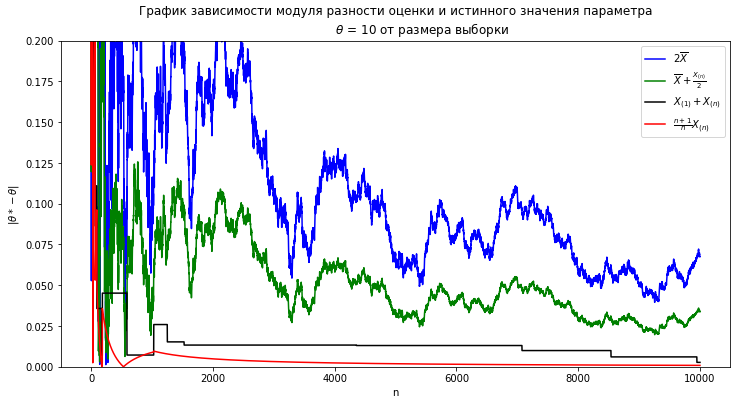

In [15]:
MakePlotWithoutThird(estimators, 0.2, theta)

In [16]:
theta = 100
sample = CreateSample(theta)
estimators = CreateEstimators(sample)

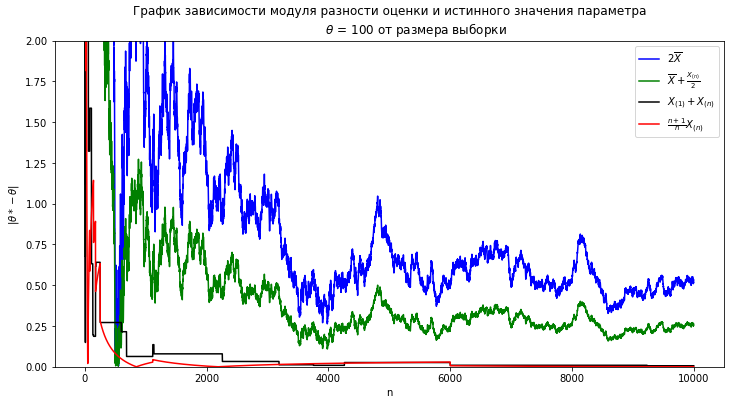

In [17]:
MakePlotWithoutThird(estimators, 2, theta)

In [20]:
theta = 1000
sample = CreateSample(theta)
estimators = CreateEstimators(sample)

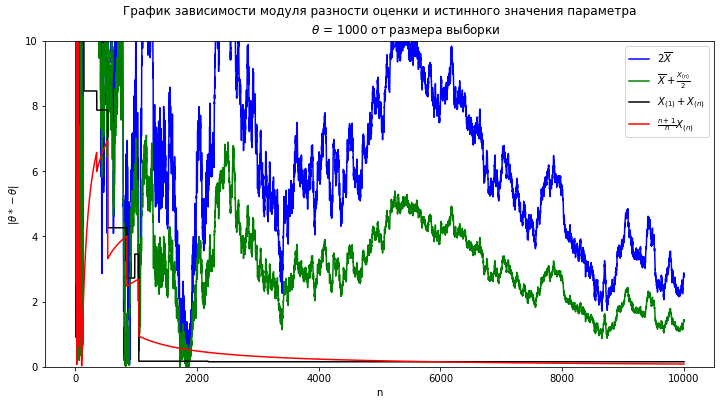

In [21]:
MakePlotWithoutThird(estimators, 10, theta)

***Вывод:*** в данной задаче мы исследовали, как ведут себя оценки параметра $\theta$ равномерного распределения и на практике подтвердили теоретические рассчеты о том, что величина $(n + 1)X_{(1)}$ не сходится к истинному значению $\theta$ даже при очень большом размере выборки, в то время как остальные величины сходятся к $\theta$, при чем наиболее быстро сходятся оценки $\frac{n + 1}{n}X_{(n)}$ и $X_{(1)} + X_{(n)}$. Также, по графикам видно, что сходимость не зависит от выбора $\theta$.